In [ ]:
"""
Created on Mon Apr  9 09:02:14 2019

@author: khaled
"""
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout



In [35]:
import numpy as np # linear algebra
import pandas as pd
df=pd.read_csv("Discharge6_H1.csv")
featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity','H']
ftr=['cycle','Capacity']
df1=df[ftr]
test=df[(df['cycle']>=82)]
f1=['cycle','H']
df=df[featurs]

In [36]:
#test=test['Capacity']
print(df1.head())

   cycle  Capacity
0      1  2.035338
1      2  2.025140
2      3  2.013326
3      4  2.013285
4      5  2.000528


In [ ]:
dataset=df[f1]
data_train=dataset[(dataset['cycle']<82)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=82)]
data_set_test=data_test.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

In [ ]:
X_train=[]
y_train=[]
for i in range(10,81):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
#Start LSTM 
regress=Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))


regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200))
regress.add(Dropout(0.3))


regress.add(Dense(units=1))

regress.compile(optimizer='adam',loss='mean_squared_error')

regress.fit(X_train,y_train,epochs=200,batch_size=50)


In [ ]:
##### predictions
data_total=pd.concat((data_train['H'],data_test['H']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

X_test=[]
for i in range(10,97):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred=regress.predict(X_test)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]

In [ ]:
fitting=df[ (df['cycle']>=82)]
fitting=fitting['Capacity']
abc=np.array(fitting)
## abc == Capacity
fitting=fitting.values
#test=per
cap=np.array(prediction)
li=[]
z=np.polyfit(cap,abc,1)
for i in range(len(abc)):
    xx=(cap[i] *0.000635589) + 0.694734
    li.append(xx)

In [29]:
prediction=[1.5161796357147215,
 1.5092897175058593,
 1.5030718539744874,
 1.4964726525604246,
 1.4897739076054686,
 1.4826992558261718,
 1.475323025135376,
 1.463604896053711,
 1.454699900024048,
 1.449340143711914,
 1.4483875360773926,
 1.4511088842432862,
 1.4562839845715332,
 1.4635340595355224,
 1.470958005953247,
 1.4767565917800294,
 1.4793861550598144,
 1.4788928597885742,
 1.4760028384676513,
 1.4629065395364989,
 1.4477429470378418,
 1.4354661172250975,
 1.4255836858656006,
 1.4178587812287597,
 1.4124939042044677,
 1.4086012319256591,
 1.4054958303479004,
 1.4022104279791259,
 1.3990059483797608,
 1.3952585181185302,
 1.3913529664727782,
 1.3868060068359376,
 1.3808780842338866,
 1.3719426742774656,
 1.3649622901538085,
 1.3591760405881348,
 1.3542739673217774,
 1.3490145304160155,
 1.343948361600952,
 1.339922085286743,
 1.3381482628364867,
 1.3380114001660766,
 1.3387615457039794,
 1.3387056833895263,
 1.3386005148239135,
 1.3380395252896728,
 1.336414397458374,
 1.3328917742195434,
 1.328517056718933,
 1.3202570376615599,
 1.311083398209961,
 1.3042140792295531,
 1.2987817019086303,
 1.294911335762329,
 1.2922231170523681,
 1.290381716718933,
 1.2889230896193236,
 1.2879341326871336,
 1.2868017570212402,
 1.2849492618114624,
 1.2825967213007812,
 1.279551526884155,
 1.2747052383457032,
 1.2676947894347532,
 1.2619207209570922,
 1.25710476875885,
 1.252263096619995,
 1.2470929230375365,
 1.2418233998805541,
 1.2375262301345216,
 1.235324789425781,
 1.2344748287940672,
 1.233779886084961,
 1.2335035615947876,
 1.2331012753441772,
 1.2326066611016235,
 1.2313499917860717,
 1.228444724708496,
 1.2249028212125244,
 1.2201014552852782,
 1.2119346952584227,
 1.205487641064697,
 1.2001217554152832,
 1.1951988889541014,
 1.190265509515686,
 1.185409212312561,
 1.1813718799152833]

In [30]:
per=test
#per['per']=pred

#per['per']=li
per['per']=prediction

In [ ]:
rmse = np.sqrt(np.mean_squared_error(per['Capacity'],per['per']))
print('Test RMSE: %.3f' % rmse)

metrics.r2_score(per['Capacity'],per['per'])

Test RMSE: 0.031
    
R^2 = 0.9051368904190076

In [31]:
print(per.head())

    Unnamed: 0 Batt_name  cycle             dateTime  amb_temp  \
81          81  B0006_11     82  2008-05-06 16:23:36        24   
82          82  B0006_11     83  2008-05-06 21:21:49        24   
83          83  B0006_11     84  2008-05-07 02:17:25        24   
84          84  B0006_11     85  2008-05-07 07:04:02        24   
85          85  B0006_11     86  2008-05-07 12:01:49        24   

    voltage_battery  current_battery  temp_battery  voltage_load  \
81         3.514081        -0.003031     34.734409           0.0   
82         3.517917        -0.003197     34.854516           0.0   
83         3.519102        -0.002833     34.714548           0.0   
84         3.521494        -0.002305     34.408442           0.0   
85         3.531200        -0.003266     34.229918           0.0   

    current_load      time  Capacity         H       per  
81        0.0006  3094.328  1.478460  1311.375  1.516180  
82        0.0006  3086.531  1.473215  1311.907  1.509290  
83        0.0006 

Text(0.5, 1.0, 'Discharge B0005')

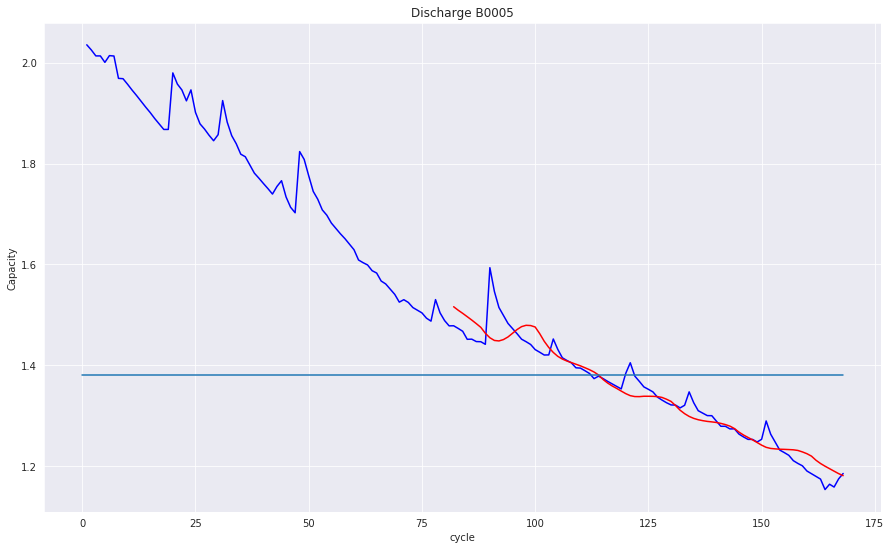

In [39]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df1.loc[(df1['cycle']>=1),['cycle','Capacity']]
plot_per=per.loc[per['cycle']>=82,['cycle','per']]
sns.set_style("darkgrid")
plt.figure(figsize=(15, 9))
plt.plot(plot_df['cycle'], plot_df['Capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['per'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

RULerror= 2 cycle(s)